In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df = train.copy()
train.head()
df.tail()
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [41]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [42]:
df.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [43]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


['SalePrice' 'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea'
 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt'
 'YearRemodAdd']


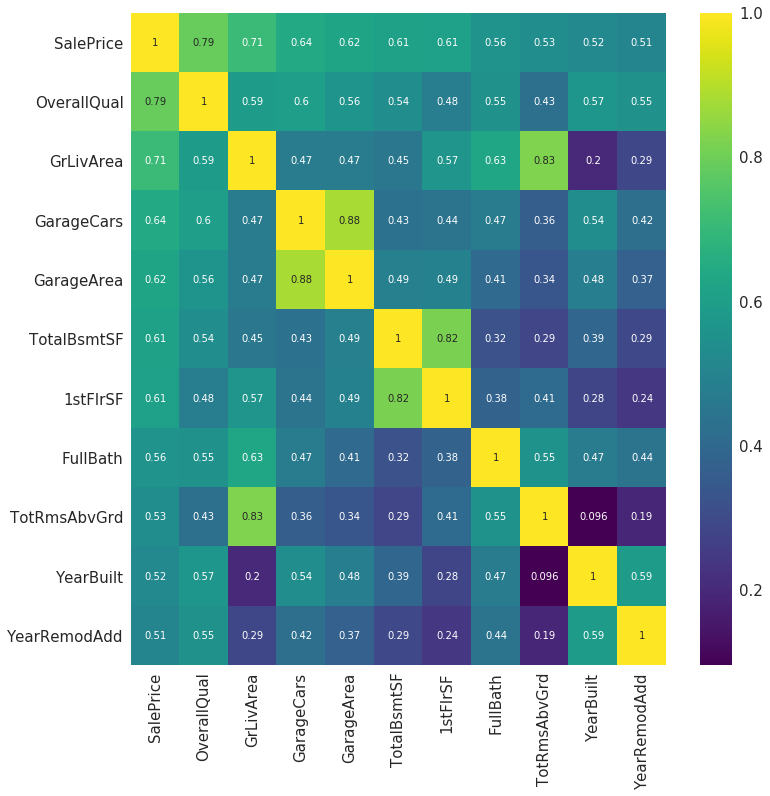

In [44]:
corrmat = df.corr()
cols = corrmat.nlargest(11, 'SalePrice')['SalePrice'].index
print(cols.values)
# df[cols].values.T
data = np.corrcoef(df[cols].values.T)
# data.shape
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 12))
plt.tight_layout()
sns.heatmap(data=data, cmap='viridis', yticklabels=cols.values, annot=True, annot_kws={'size': 10}, xticklabels=cols.values)
# sns.heatmap(cols, cmap='viridis')
# top10cor = corrmat.nlargest(10)
# top10corr = np.array([top10cor], ndmin=1)
# sns.heatmap(df.corr()['SalePrice'], yticklabels=True, xticklabels=True, annot=True, cmap='viridis')


Now we'll take ['SalePrice' 'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea'
 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt'
 'YearRemodAdd'] these features. 
 
 But one thing to note here all these features are correlated w/ each other also. See light green squares near a yellow square(with cf=0.8 or more)

Let's make a pair plot to have all the glance

GarageCars and GarageArea are highly correlated with each other, so lets keep only garage area 

In [56]:
feature_list = cols.tolist()
feature_list.append('Id')
# feature_list.remove('GarageArea')
feature_list.remove('TotRmsAbvGrd')
feature_list.remove('GarageCars')
feature_list.remove('1stFlrSF')
feature_list

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'Id']

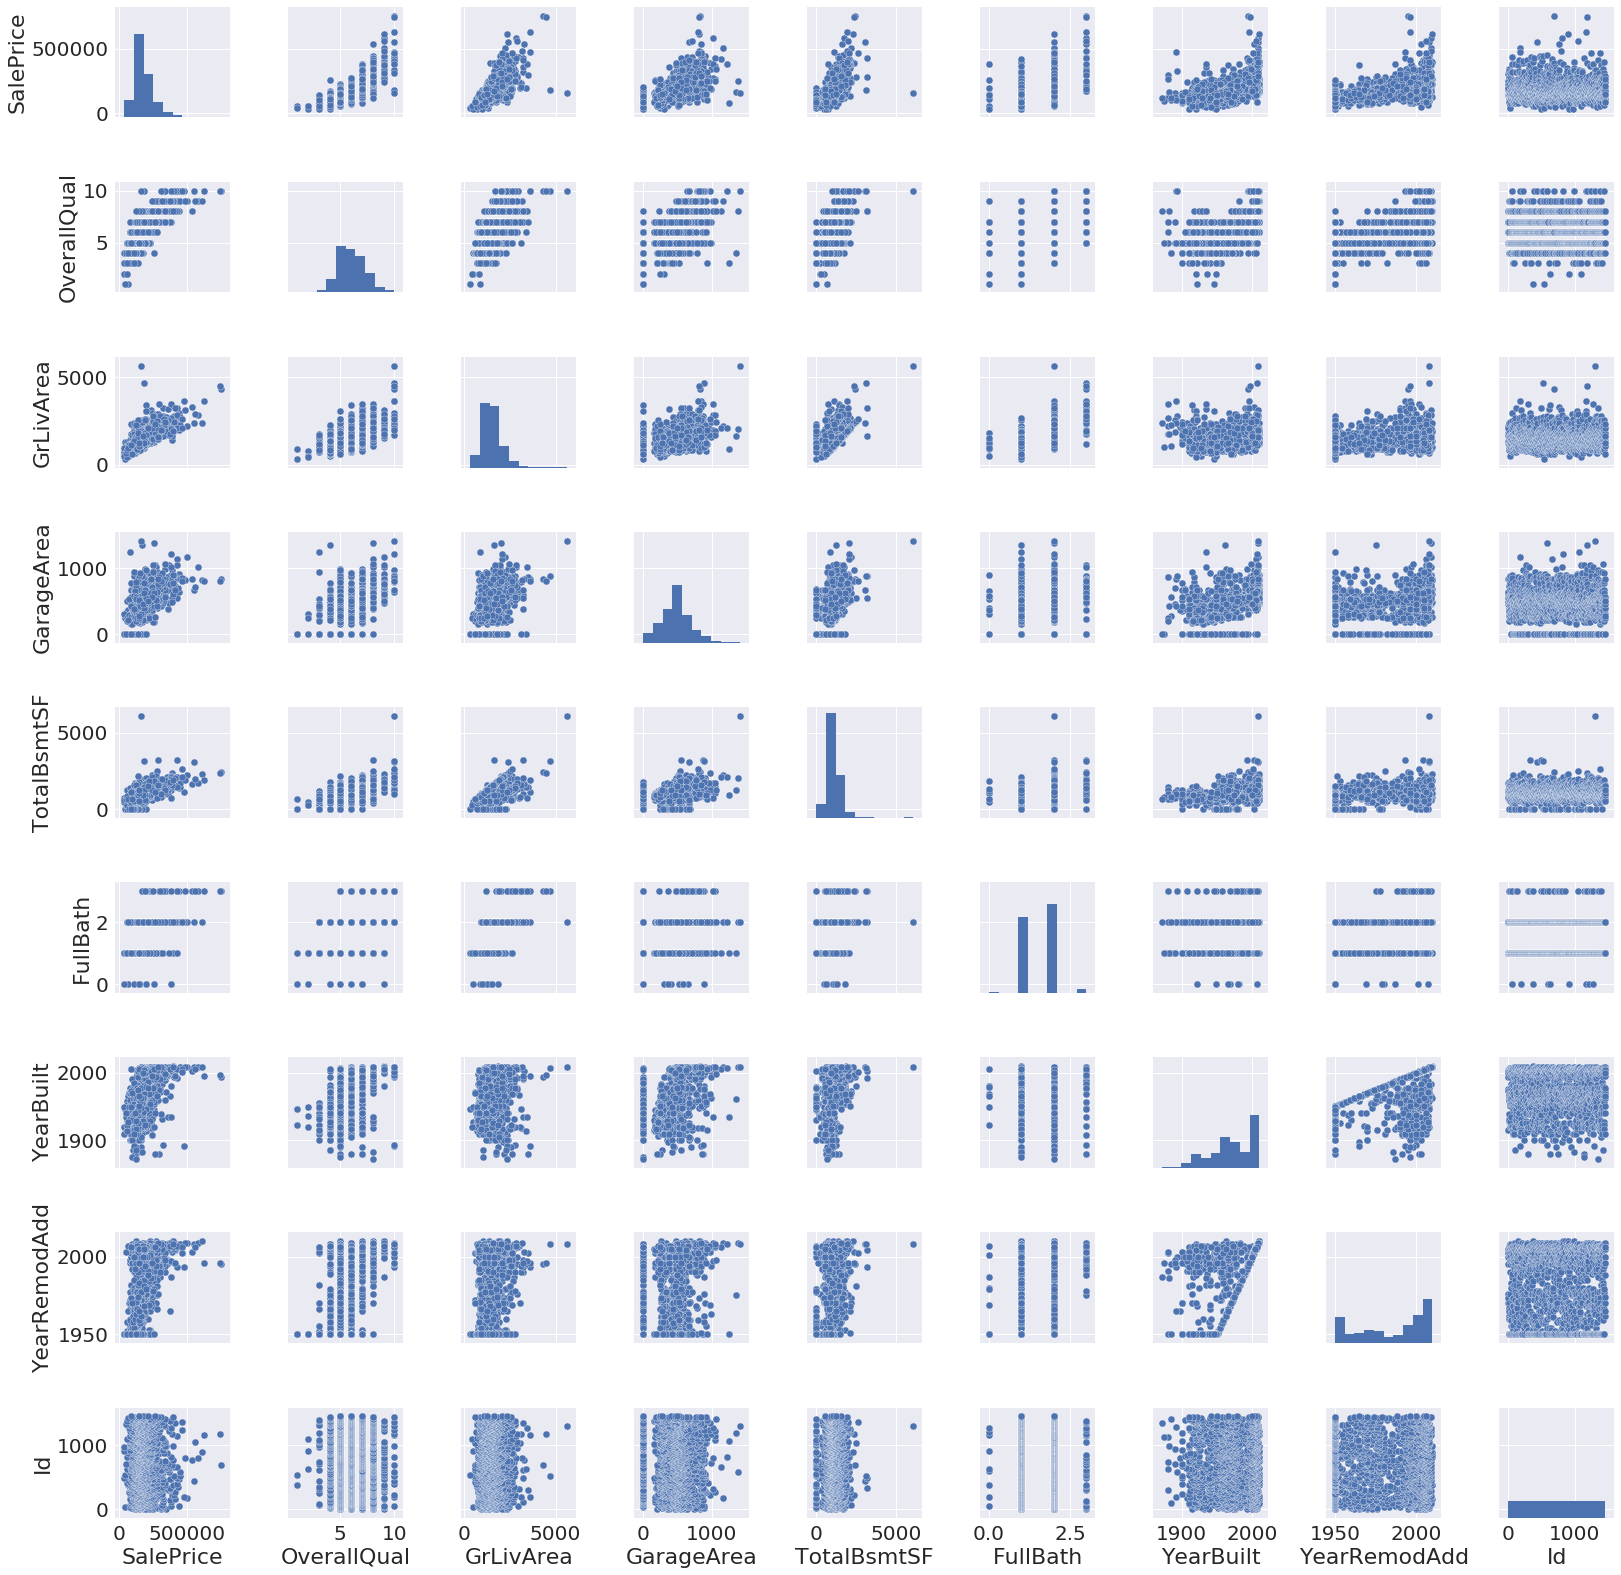

In [57]:
sns.set(font_scale=2)
plt.tight_layout()
sns.pairplot(df[feature_list], dropna=True)

**Observations from the pairplot**
> TotalBsmtSF and 1stFlrSF are highly correlated.
> We need to explore TotalBsmtSF, GrLivArea, 1stFlrSF wit SalePrice to search for outliers and missing data

**Missing Data **

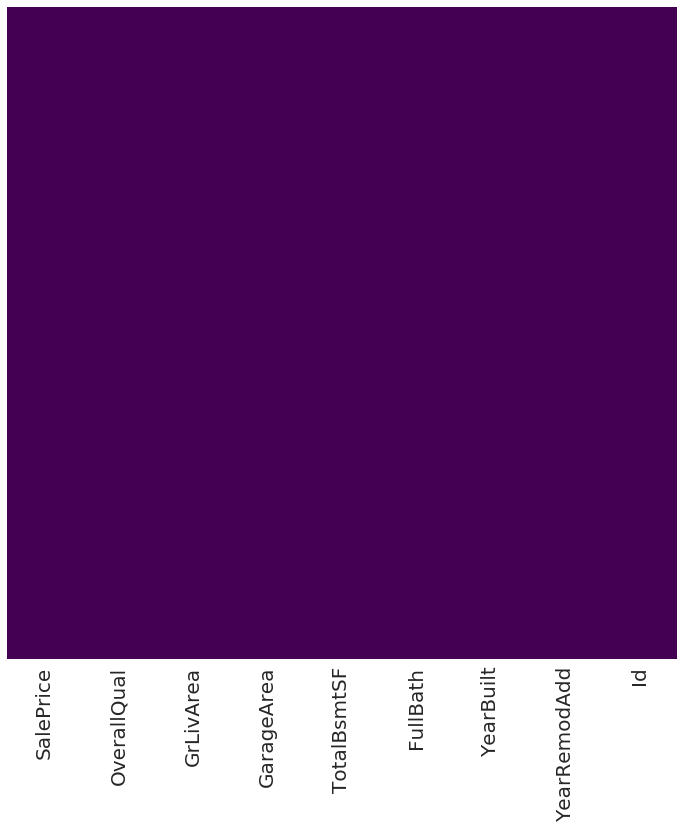

In [58]:
#Visualising NULL values via heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df[feature_list].isnull(), cmap='viridis', cbar=False, yticklabels=False, xticklabels=feature_list);

In [60]:
df_feat = df[feature_list].copy()

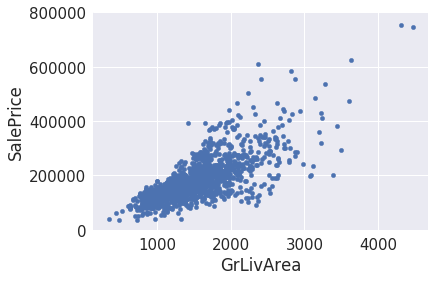

In [64]:
#bivariate analysis saleprice/grlivarea
sns.set(font_scale=1.5)
var = 'GrLivArea'
data = pd.concat([df_feat['SalePrice'], df_feat[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We got outliers here, see in GRLIVArea above 4k. so we'll delete them

In [62]:
df_feat.sort_values(by='GrLivArea', ascending=False)[:2]

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Id
1298,160000,10,5642,1418,6110,2,2008,2008,1299
523,184750,10,4676,884,3138,3,2007,2008,524


In [63]:
df_feat.drop(df_feat[df_feat['Id']==1299].index, inplace=True)
df_feat.drop(df_feat[df_feat['Id']==524].index, inplace=True)
# df_feat[df['Id']==524]



-------------------------------------------------------------------------------------



In [27]:
# #bivariate analysis saleprice/grlivarea
# var = '1stFlrSF'
# data = pd.concat([df_feat['SalePrice'], df_feat[var]], axis=1)
# data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [28]:
# df_feat.sort_values(by='1stFlrSF', ascending=False)[:2]
# #

again outlier at greator than 3000

In [477]:
# df_feat.drop(df_feat[df_feat['1stFlrSF']==4692].index, inplace=True)
# df_feat.drop(df_feat[df_feat['1stFlrSF']==3138].index, inplace=True)



------------------------------------------------------------------



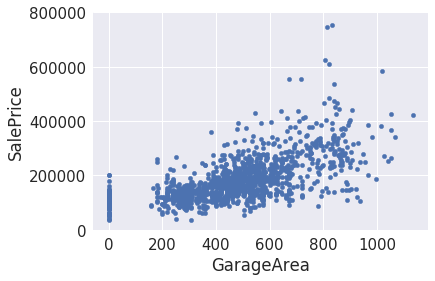

In [73]:
#bivariate analysis saleprice/grlivarea/Cars [Choose after seeing performance of both.]
var = 'GarageArea'
data = pd.concat([df_feat['SalePrice'], df_feat[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [71]:
df_feat.sort_values(by='GarageArea', ascending=False)[:3]


,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Id
1061,81000,3,894,1248,894,1,1935,1950,1062
825,385000,10,2084,1220,2078,2,2007,2008,826
178,501837,9,2234,1166,2216,2,2008,2009,179


In [67]:
df_feat.drop(df_feat[df_feat['Id']==582].index, inplace=True)
df_feat.drop(df_feat[df_feat['Id']==1191].index, inplace=True)

In [72]:
df_feat.drop(df_feat[df_feat['Id']==1062].index, inplace=True)
df_feat.drop(df_feat[df_feat['Id']==826].index, inplace=True)
df_feat.drop(df_feat[df_feat['Id']==179].index, inplace=True)

We'll drop values above garageArea 

In [69]:
# df.drop(df[feature_list].sort_values(by='GarageArea', ascending=False)[:4], axis=1, inplace=False)
# df_feat = df[feature_list].copy()
df_feat.head()

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Id
0,208500,7,1710,548,856,2,2003,2003,1
1,181500,6,1262,460,1262,2,1976,1976,2
2,223500,7,1786,608,920,2,2001,2002,3
3,140000,7,1717,642,756,1,1915,1970,4
4,250000,8,2198,836,1145,2,2000,2000,5


In [480]:
# df_feat.drop('TotRmsAbvGrd', axis=1, inplace=True)



------



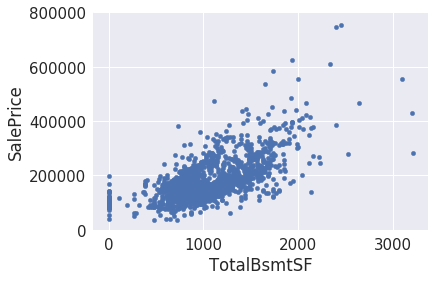

In [74]:
#bivariate analysis saleprice/totalbsmntsf
var = 'TotalBsmtSF'
data = pd.concat([df_feat['SalePrice'], df_feat[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));



----



In [75]:
df_feat.drop('YearRemodAdd', axis=1, inplace=True)

In [485]:
# decide b/w TotalBsmtSF and 1stFlrSF
# df_feat.drop('1stFlrSF', axis=1, inplace=True)
# no they both are helping...

In [76]:
df_feat.head(2)

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,Id
0,208500,7,1710,548,856,2,2003,1
1,181500,6,1262,460,1262,2,1976,2


In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_feat['SalePriceV2'] = scaler.fit_transform(df_feat['SalePrice'][:, np.newaxis])
scaled_price[scaled_price[:, 0].argsort()]

/home/aadi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.84642523],
       [-1.8412167 ],
       [-1.80840674],
       ...,
       [ 5.63181298],
       [ 7.15255284],
       [ 7.27928116]])

---

** Curve Fitting **

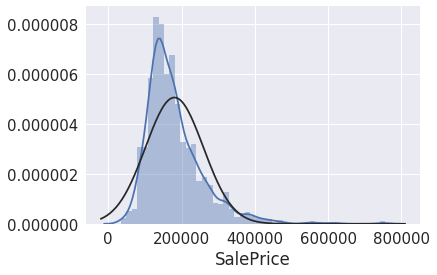

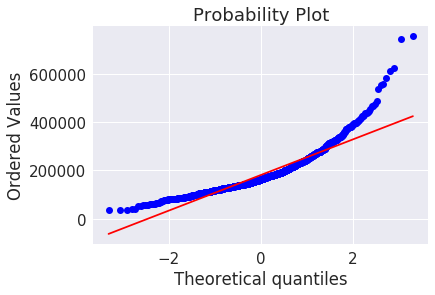

In [124]:
from scipy import stats
from scipy.stats import norm
sns.distplot(df_feat['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_feat['SalePrice'], plot=plt)


In [126]:
df_feat['SalePrice_log'] = df_feat['SalePrice']
df_feat['SalePrice_log'] = np.log(df_feat['SalePrice_log'])

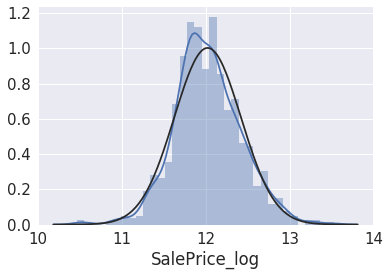

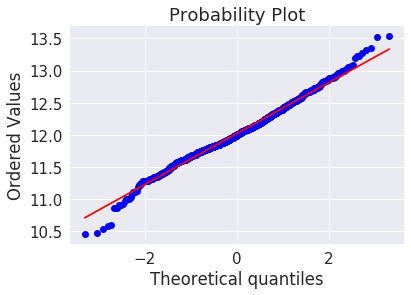

In [128]:
sns.distplot(df_feat['SalePrice_log'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_feat['SalePrice_log'], plot=plt)

Let's Check with GRLIV Area

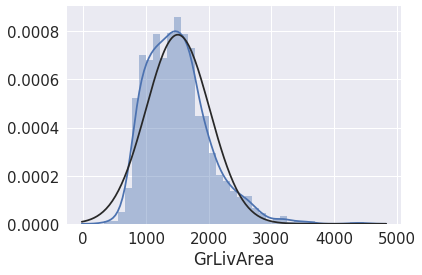

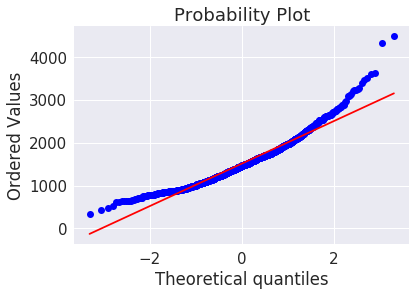

In [129]:
sns.distplot(df_feat['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_feat['GrLivArea'], plot=plt)

In [132]:
df_feat['GrLivArea'] = np.log(df_feat['GrLivArea'])

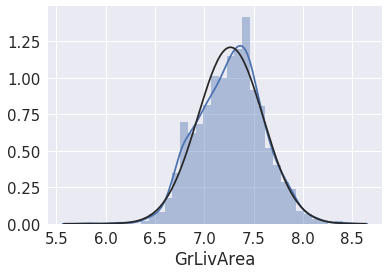

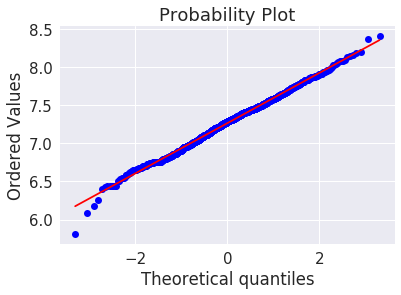

In [133]:
sns.distplot(df_feat['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_feat['GrLivArea'], plot=plt)

In [143]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_feat['HasBsmt'] = pd.Series(len(df_feat['TotalBsmtSF']), index=df_feat.index)
df_feat['HasBsmt'] = 0 
df_feat.loc[df_feat['TotalBsmtSF']>0,'HasBsmt'] = 1
df_feat.head()

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,YearBuilt,Id,1,2,3,SalePriceV2,SalePrice_log,HasBsmt
0,208500,7,7.444249,548,856,2003,1,0,1,0,0.353578,12.247694,1
1,181500,6,7.140453,460,1262,1976,2,0,1,0,0.011412,12.109011,1
2,223500,7,7.487734,608,920,2001,3,0,1,0,0.543671,12.317167,1
3,140000,7,7.448334,642,756,1915,4,1,0,0,-0.514511,11.849398,1
4,250000,8,7.695303,836,1145,2000,5,0,1,0,0.879501,12.429216,1


In [144]:
df_feat.loc[df_feat['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_feat['TotalBsmtSF'])


/home/aadi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


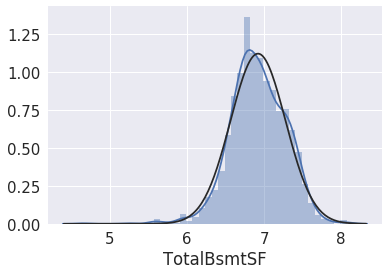

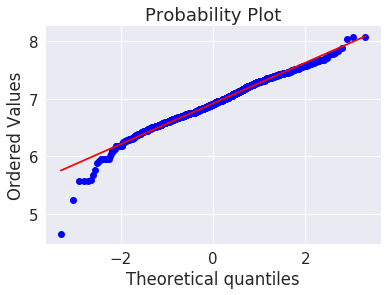

In [146]:
#histogram and normal probability plot
sns.distplot(df_feat[df_feat['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_feat[df_feat['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [147]:
df_feat.head()

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,YearBuilt,Id,1,2,3,SalePriceV2,SalePrice_log,HasBsmt
0,208500,7,7.444249,548,6.752270,2003,1,0,1,0,0.353578,12.247694,1
1,181500,6,7.140453,460,7.140453,1976,2,0,1,0,0.011412,12.109011,1
2,223500,7,7.487734,608,6.824374,2001,3,0,1,0,0.543671,12.317167,1
3,140000,7,7.448334,642,6.628041,1915,4,1,0,0,-0.514511,11.849398,1
4,250000,8,7.695303,836,7.043160,2000,5,0,1,0,0.879501,12.429216,1


In [150]:
df_feat.drop(['SalePriceV2'], axis=1, inplace=True)

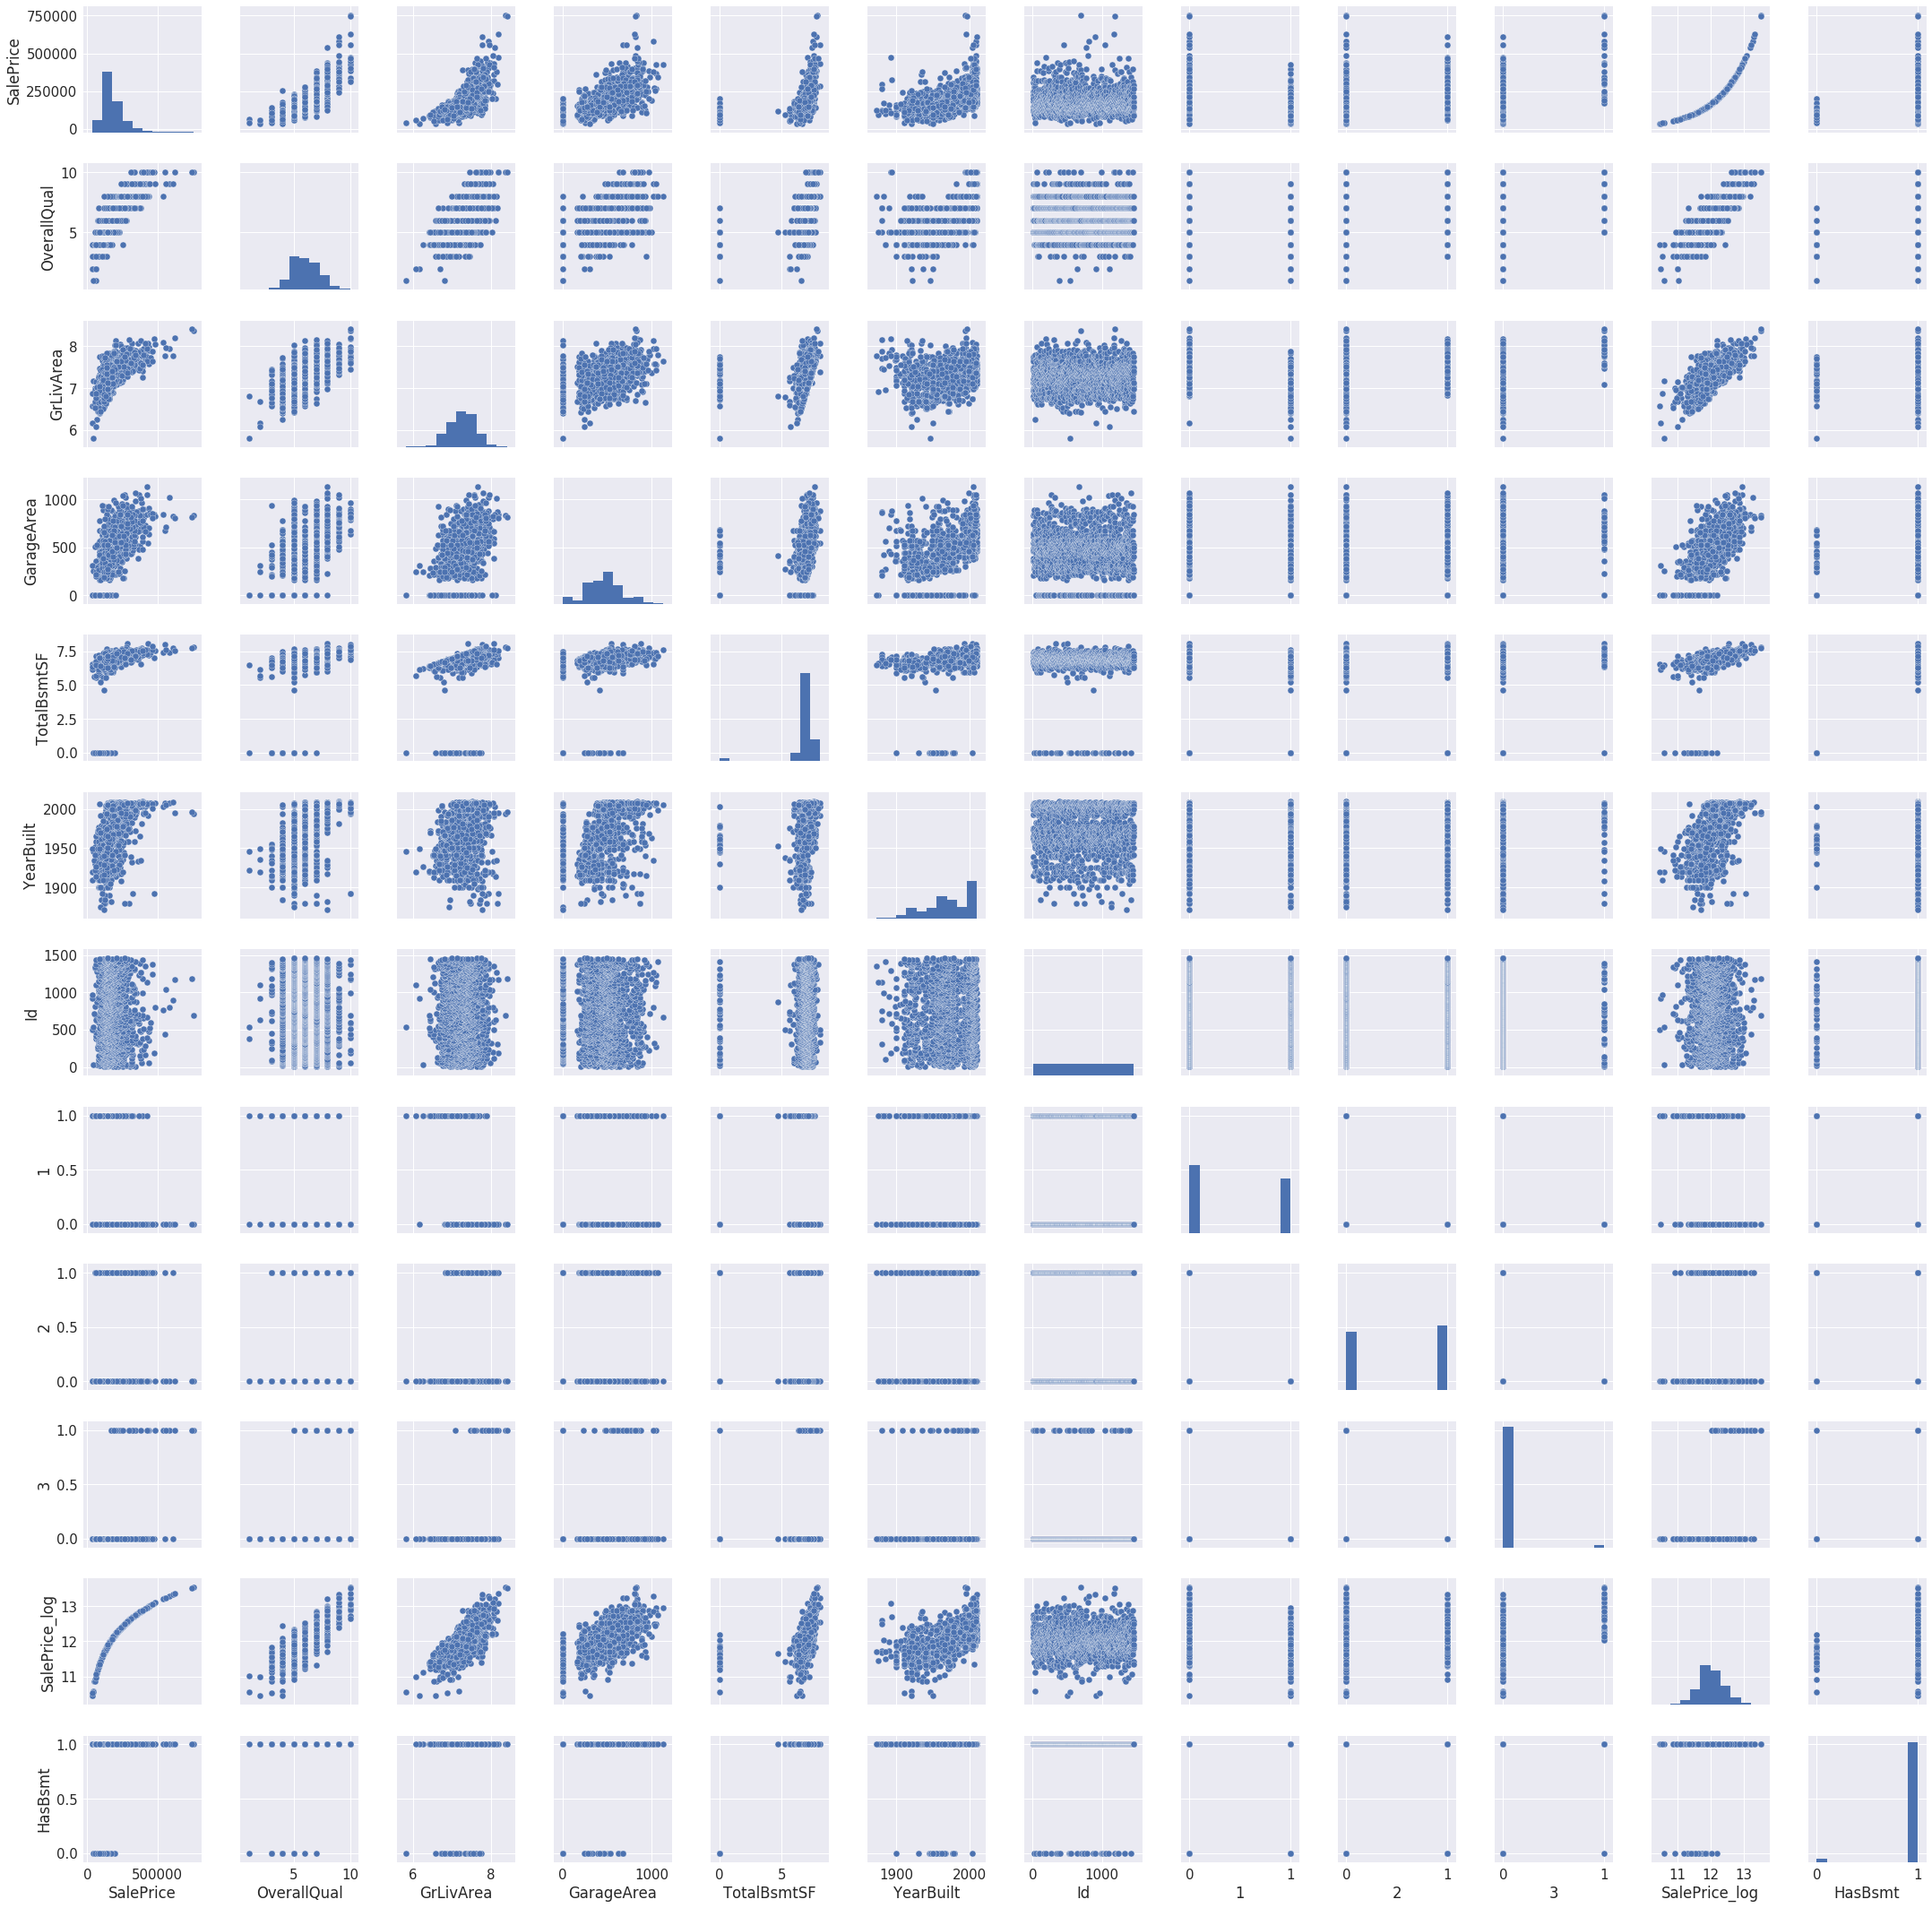

In [151]:
sns.pairplot(df_feat)

In [83]:
# After testing without this, then implement this
# scaled_bathroom = scaler.fit_transform(df_feat['FullBath'][:, np.newaxis])
# scaled_bathroom[scaled_bathroom[:, 0].argsort()]

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [104]:
bath = pd.get_dummies(df_feat['FullBath'], drop_first=True)
df_feat = pd.concat([df_feat, bath], axis=1)
df_feat.drop('FullBath', axis=1, inplace=True)
df_feat.head()

KeyError: 'FullBath'

In [152]:
df_feat.head(2)

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,YearBuilt,Id,1,2,3,SalePrice_log,HasBsmt
0,208500,7,7.444249,548,6.752270,2003,1,0,1,0,12.247694,1
1,181500,6,7.140453,460,7.140453,1976,2,0,1,0,12.109011,1


Here the main problem is multicollinearity, the features are correlated with each other and its a huge problem.
as results may be biased in the end.

In [91]:
x = scaled_price.ravel()
x.shape

(1453,)

In [165]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [168]:
feature_list

['OverallQual',
 'GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'Id']

In [169]:
from sklearn.model_selection import train_test_split
X = df_feat.drop(['SalePrice', 'SalePrice_log', 'HasBsmt', 'Id'], axis=1)
# y = df_feat['SalePrice']
y = df_feat['SalePrice_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [170]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [171]:
pred = rfr.predict(X_test)
# pred = gb.predict(X_test)
pred

array([11.96101455, 11.64638203, 12.39695897, 11.87635751, 11.71970913,
       12.77475973, 12.1227797 , 12.09195065, 12.41586427, 12.03186033,
       11.41670833, 11.89489018, 11.80676931, 12.22249247, 11.91110502,
       12.20872881, 11.53420394, 12.06475407, 12.36917048, 11.86419245,
       11.62634171, 12.02475467, 12.20464906, 11.94100838, 11.81471142,
       12.69708634, 11.49844761, 11.60579068, 12.09346518, 11.81676986,
       11.90830354, 12.16718276, 11.7304991 , 12.37943027, 11.80280894,
       11.74980277, 11.72250258, 11.9208981 , 12.29975998, 11.86041437,
       11.85785345, 11.94661407, 12.00726584, 11.64905269, 12.59285617,
       11.84971516, 12.09761524, 11.59326069, 12.14983559, 12.08231236,
       11.76895635, 12.22269183, 12.20618267, 11.86172996, 12.54493721,
       12.59396452, 11.19351216, 12.03010928, 12.21554947, 11.84557057,
       12.10654314, 12.14865467, 11.81470842, 11.84258034, 12.5358612 ,
       12.29857744, 12.45883202, 11.60133272, 11.87529118, 12.55

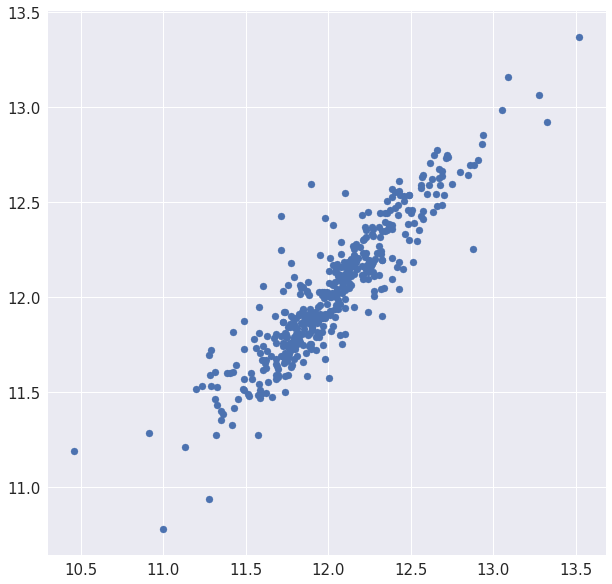

In [172]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred)

In [96]:
from sklearn import metrics

In [173]:
print('With Dummies')
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

With Dummies
MAE: 0.1135475416692166
MSE: 0.02540329348162969
RMSE: 0.15938410674101006


In [174]:
pred  = np.exp(pred)

In [ ]:
n

In [175]:
pred

array([156531.8141896 , 114277.16266068, 242064.37179656, 143825.71165592,
       122971.65164987, 353189.39710825, 184016.31495196, 178429.82267962,
       246684.20338597, 168023.70164592,  90826.67776721, 146516.03788754,
       134157.439831  , 203311.07490497, 148911.13852287, 200531.93984857,
       102150.64756431, 173642.5345556 , 235430.36990688, 142086.66223212,
       112009.80742907, 166834.01407124, 199715.48501858, 153431.3298597 ,
       135227.17428064, 326794.34667245,  98562.64419803, 109731.38288683,
       178700.26385645, 135505.81875396, 148494.55000496, 192371.3235944 ,
       124305.69590547, 237858.26929615, 133627.17643534, 126728.56179181,
       123315.6467636 , 150376.60170106, 219643.2632738 , 141550.86004937,
       141188.8235819 , 154293.83273925, 163941.64757983, 114582.76589845,
       294447.55082389, 140044.45169894, 179443.42123168, 108365.02773638,
       189063.00265885, 176718.32443182, 129179.26291559, 203351.61031881,
       200022.00546828, 1

In [176]:
print('MAE:', metrics.mean_absolute_error(np.exp(y_test), pred))
print('MSE:', metrics.mean_squared_error(np.exp(y_test), pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), pred)))

MAE: 20093.155774039533
MSE: 940035918.5892006
RMSE: 30660.005195518163


In [102]:
.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,YearBuilt,Id,1,2,3
1145,5,1576,225,1042,1928,1146,1,0,0
891,6,1683,440,918,1978,892,0,1,0
757,6,1386,440,672,1978,758,0,1,0
146,5,875,180,715,1931,147,1,0,0
1456,6,2073,500,1542,1978,1457,0,1,0


In [147]:
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': pred})
submission.to_csv('submission.csv', index=False)
submission.head(3)

ValueError: array length 2918 does not match index length 1459